In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from zipfile import ZipFile
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('kmean_data.csv')

In [3]:
df.columns

Index(['loan_amnt', 'int_rate', 'flag', 'install_loan_ratio', 'installment',
       'grade', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'term_ 36 months', 'term_ 60 months',
       'emp_length_1 year', 'emp_length_10 years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_less 1 year',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_medical',
       'purpose_other', 'purpose_small_business',
       'verification_status_Verified_sum', 'Return'],
      dtype='object')

In [4]:
data = df[['int_rate','loan_amnt','grade','install_loan_ratio','term_ 36 months','term_ 60 months','Return']]

In [5]:
#data = df[['int_rate','loan_amnt','grade','install_loan_ratio','term_ 36 months','term_ 60 months','Return']]

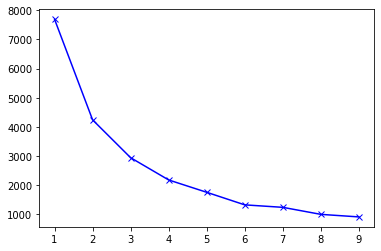

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist  

aa=[] 
K = range(1, 10) 
for k in range(1,10): 
    kmeans=KMeans(n_clusters=k) 
    kmeans.fit(data) 
    aa.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'),axis=1))/data.shape[0]) 
plt.figure() 
plt.plot(np.array(K), aa, 'bx-') 
plt.show()

In [7]:
k=4
kmodel = KMeans(n_clusters = k, n_jobs = 4) 
kmodel.fit(data) 
r1 = pd.Series(kmodel.labels_).value_counts()
r2 = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['Members'] # No of categories
print(r)

    int_rate     loan_amnt     grade  install_loan_ratio  term_ 36 months  \
0  12.231599   5641.342500  2.435860            3.336329         1.000000   
1  14.089913  33039.161736  2.857988            2.957563         0.564103   
2  14.297339  21357.869751  2.907729            2.968454         0.564322   
3  13.385159  12625.157588  2.701956            3.069061         0.699531   

   term_ 60 months    Return  Members  
0    -6.439294e-15  0.986629     5530  
1     4.358974e-01  0.995836     2528  
2     4.356780e-01  0.994593     3741  
3     3.004687e-01  0.991355     6189  


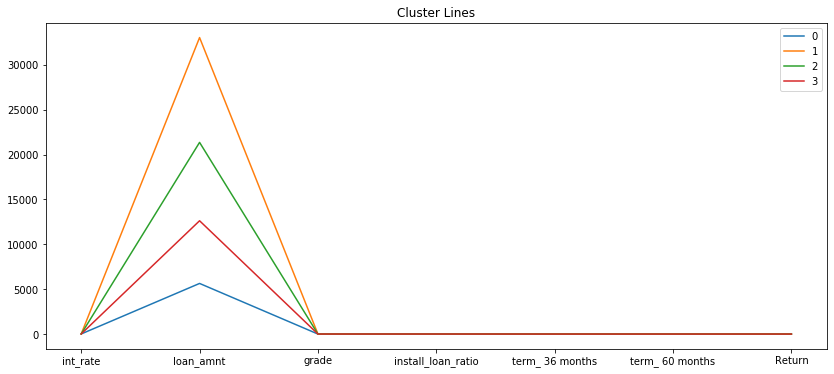

In [9]:
r.iloc[:,:-1].T.plot(figsize=(14,6),title=('Cluster Lines'))

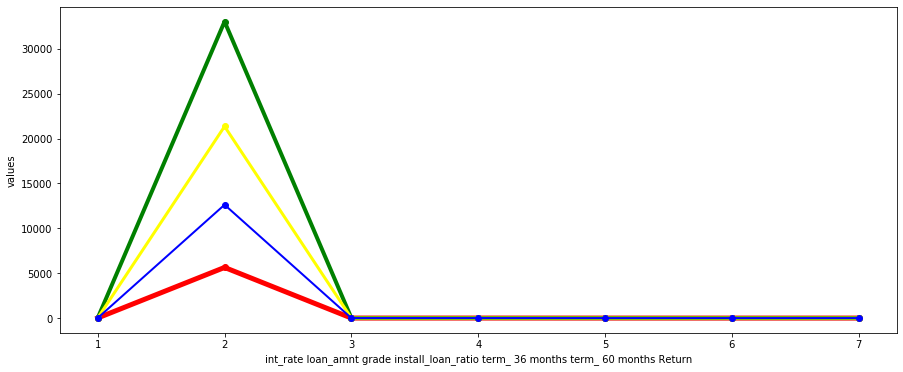

In [8]:
plt.figure(figsize=(15,6))
clu = kmodel.cluster_centers_  
x = [1,2,3,4,5,6,7]  
colors = ['red','green','yellow','blue','black','orange','pink']  
for i in range(4):  
   plt.plot(x,clu[i],label='clustre '+str(i),linewidth=5-i,color=colors[i],marker='o')   
plt.xlabel('int_rate loan_amnt grade install_loan_ratio term_ 36 months term_ 60 months Return')  
plt.ylabel('values')  
#plt.figure(figsize=(10,15))
plt.show()